<a href="https://colab.research.google.com/github/salochaud/aprendizajeautomatico/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot

plt.rcParams["figure.figsize"] = (8, 5)

df = pd.read_csv('/content/gym_members_exercise_tracking.csv')
display(df.head())
print(df.columns)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [2]:
rename_columns = {
    "Weight (kg)": "Weight_kg",
    "Height (m)": "Height_m",
    "Session_Duration (hours)": "Session_Duration_h",
    "Water_Intake (liters)": "Water_Intake_l",
    "Workout_Frequency (days/week)": "Workout_Frequency"
}

df = df.rename(columns=rename_columns)

display(df.head())
print(df.columns)

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_h,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_l,Workout_Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Index(['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_h', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake_l', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')


## Filtrado de datos

En este caso se seleccionan como variables predictoras (`X`) las características relacionadas con la intensidad y cantidad de entrenamiento, y como variable objetivo (`y`) las calorías quemadas.

In [3]:

x = df[[
    'Age',
    'BMI',
    'Workout_Frequency',
    'Session_Duration_h',
    'Max_BPM'
]]
y = df['Calories_Burned']

display(x.head())
display(y.head())

,Age,BMI,Workout_Frequency,Session_Duration_h,Max_BPM
0,56,30.20,4,1.69,180
1,46,32.00,4,1.30,179
2,32,24.71,4,1.11,167
3,25,18.41,3,0.59,190
4,38,14.39,3,0.64,188


,Calories_Burned
0,1313.0
1,883.0
2,677.0
3,532.0
4,556.0


## Método de filtro: SelectKBest

Se aplica **SelectKBest** con la métrica **f_regression**, que evalúa la relación lineal entre cada característica y la variable objetivo.

In [4]:

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(x, y)

f_scores = selector.scores_
p_values = selector.pvalues_

df_kbest = pd.DataFrame({
    'Característica': x.columns,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values('F_score', ascending=False)

display(df_kbest)

# Clasificar aceptadas / rechazadas con un umbral sencillo en F_score
accepted = []
rejected = []

for i in range(len(f_scores)):
    if f_scores[i] > 1:   # umbral simple
        accepted.append(x.columns[i])
    else:
        rejected.append(x.columns[i])

print('Pasan el test:		', accepted)
print('No pasan el test:	', rejected)

,Característica,F_score,p_value
3,Session_Duration_h,4568.674447,0.000000e+00
2,Workout_Frequency,482.481773,3.907234e-87
0,Age,23.801133,1.247822e-06
1,BMI,3.480216,6.240802e-02
4,Max_BPM,0.004242,9.480864e-01


Pasan el test:		 ['Age', 'BMI', 'Workout_Frequency', 'Session_Duration_h']
No pasan el test:	 ['Max_BPM']


## Aplicar modelos de selección de características

Se utilizará un **modelo de regresión lineal** como estimador base para distintos métodos de selección de características. En particular se emplearán:

- **Exhaustive Feature Selector (EFS)**
- **Sequential Feature Selector (SFS)**

Ambos métodos se evaluarán con la métrica `neg_mean_absolute_error`, que es consistente con un problema de regresión.

In [5]:

!pip install mlxtend -q

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()

In [6]:
# Exhaustive Feature Selector (EFS)
efs = EFS(
    lr,
    min_features=1,
    max_features=5,
    scoring='neg_mean_absolute_error',
    print_progress=False
)

efs = efs.fit(x, y)

print('Mejor puntuación (EFS):	', efs.best_score_)
print('Mejores características (EFS):', efs.best_feature_names_)

df_res_efs = pd.DataFrame(efs.get_metric_dict()).T
df_res_efs = df_res_efs.sort_values(by='avg_score', ascending=False)
df_res_efs

Mejor puntuación (EFS):	 -85.72454395605183
Mejores características (EFS): ('Age', 'BMI', 'Session_Duration_h')


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
16,"(0, 1, 3)","[-82.01479748718053, -81.89923979215031, -83.9...",-85.724544,"(Age, BMI, Session_Duration_h)",5.241385,4.077975,2.038988
25,"(0, 1, 2, 3)","[-81.965487727471, -81.76267352125086, -83.961...",-85.764162,"(Age, BMI, Workout_Frequency, Session_Duration_h)",5.438381,4.231245,2.115623
27,"(0, 1, 3, 4)","[-81.89401093212244, -81.78084767379934, -85.1...",-85.960061,"(Age, BMI, Session_Duration_h, Max_BPM)",5.211419,4.054661,2.027331
30,"(0, 1, 2, 3, 4)","[-81.83660656543992, -81.63512303292806, -85.1...",-85.996788,"(Age, BMI, Workout_Frequency, Session_Duration...",5.404821,4.205135,2.102567
7,"(0, 3)","[-82.7307834666088, -81.83063389867758, -84.28...",-86.382521,"(Age, Session_Duration_h)",5.772501,4.491202,2.245601
18,"(0, 2, 3)","[-82.7368166510481, -81.70899706609181, -84.27...",-86.45017,"(Age, Workout_Frequency, Session_Duration_h)",5.989179,4.659785,2.329892
20,"(0, 3, 4)","[-82.6924059603478, -81.77546963261265, -85.10...",-86.561859,"(Age, Session_Duration_h, Max_BPM)",5.733276,4.460683,2.230342
28,"(0, 2, 3, 4)","[-82.69638457962535, -81.64299552466858, -85.0...",-86.615566,"(Age, Workout_Frequency, Session_Duration_h, M...",5.931166,4.614649,2.307324
21,"(1, 2, 3)","[-86.59522574608054, -86.11012158973922, -92.3...",-89.647925,"(BMI, Workout_Frequency, Session_Duration_h)",4.117117,3.203257,1.601628
10,"(1, 3)","[-86.71798649454017, -86.3667345447542, -92.33...",-89.683193,"(BMI, Session_Duration_h)",4.018766,3.126737,1.563368


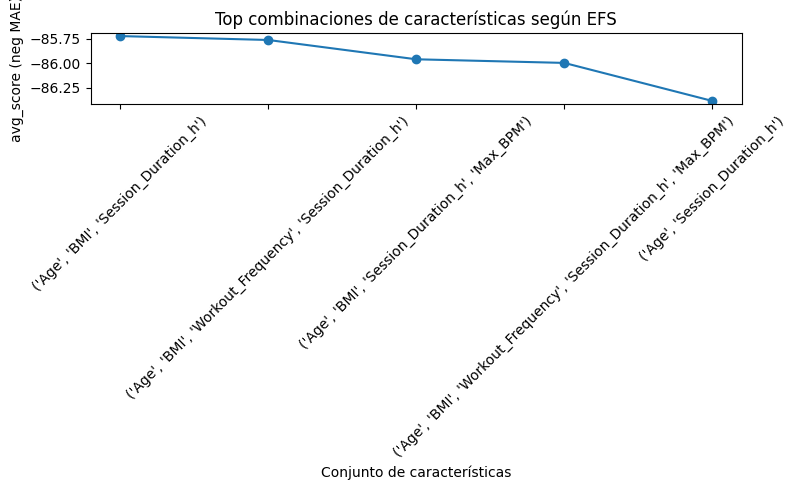

In [7]:
# Gráfica de las 5 mejores combinaciones según EFS
plt.figure()
top_k = 5
plt.plot(
    df_res_efs.iloc[:top_k].feature_names.astype(str),
    df_res_efs.iloc[:top_k].avg_score,
    marker='o'
)
plt.xticks(rotation=45)
plt.title('Top combinaciones de características según EFS')
plt.xlabel('Conjunto de características')
plt.ylabel('avg_score (neg MAE)')
plt.tight_layout()
plt.show()

In [8]:
# Sequential Feature Selector (SFS) con backward selection
sfs = SFS(
    lr,
    k_features=(1, 5),
    forward=False,
    scoring='neg_mean_absolute_error',
    cv=5
)

sfs = sfs.fit(x, y)

print('K mejor puntuación (SFS):	', sfs.k_score_)
print('K mejores características (SFS):	', sfs.k_feature_names_)

df_res_sfs = pd.DataFrame(sfs.subsets_).T.sort_values('avg_score', ascending=False)
df_res_sfs

K mejor puntuación (SFS):	 -85.72454395605183
K mejores características (SFS):	 ('Age', 'BMI', 'Session_Duration_h')


,feature_idx,cv_scores,avg_score,feature_names
3,"(0, 1, 3)","[-82.01479748718053, -81.89923979215031, -83.9...",-85.724544,"(Age, BMI, Session_Duration_h)"
4,"(0, 1, 2, 3)","[-81.965487727471, -81.76267352125086, -83.961...",-85.764162,"(Age, BMI, Workout_Frequency, Session_Duration_h)"
5,"(0, 1, 2, 3, 4)","[-81.83660656543992, -81.63512303292806, -85.1...",-85.996788,"(Age, BMI, Workout_Frequency, Session_Duration..."
2,"(0, 3)","[-82.7307834666088, -81.83063389867758, -84.28...",-86.382521,"(Age, Session_Duration_h)"
1,"(3,)","[-88.48334816586244, -85.9315846332546, -92.57...",-90.236005,"(Session_Duration_h,)"


## Otras métricas y métodos de selección de características

"
"Una técnica muy utilizada en la literatura para problemas de regresión es la **Eliminación Recursiva de Características** (*Recursive Feature Elimination*, RFE). "
"RFE se basa en entrenar un estimador (por ejemplo, regresión lineal) y asignar una importancia a cada variable a partir de sus coeficientes. "
"En cada iteración se eliminan las características menos relevantes y se repite el proceso hasta alcanzar un número deseado de variables.

"
"De acuerdo con la documentación de scikit-learn, RFE permite obtener un *ranking* de importancia de las características y seleccionar automáticamente el subconjunto con mejor desempeño para el modelo.

"
"**Fuentes sugeridas para el reporte escrito:**
"
"- Scikit-learn developers. *Feature selection*. Documentación oficial de scikit-learn: https://scikit-learn.org/stable/modules/feature_selection.html
"
"- Scikit-learn developers. *sklearn.feature_selection.RFE*. Documentación oficial: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html


Ranking de características (1 = más importante):
Age: 2
BMI: 4
Workout_Frequency: 3
Session_Duration_h: 1
Max_BPM: 5


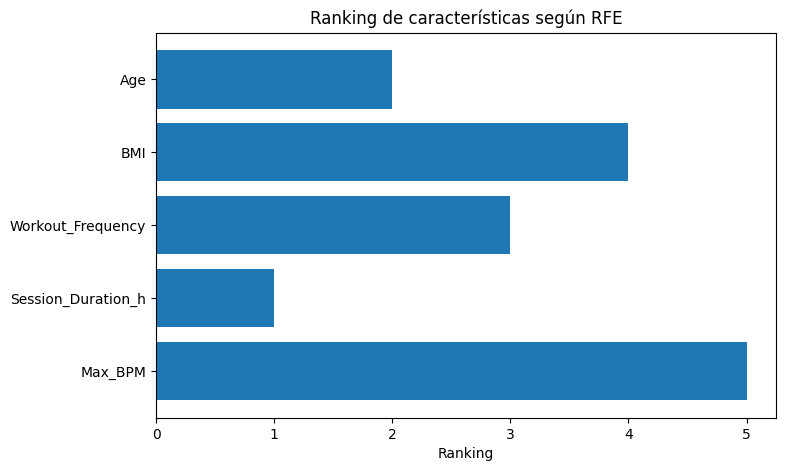

In [9]:
from sklearn.feature_selection import RFE

# RFE con regresión lineal como estimador base
rfe = RFE(estimator=lr, n_features_to_select=1)
rfe.fit(x, y)

ranking = rfe.ranking_
print('Ranking de características (1 = más importante):')
for nombre, rank in zip(x.columns, ranking):
    print(f'{nombre}: {rank}')

# Gráfica del ranking
plt.figure()
plt.barh(range(len(ranking)), ranking, align='center')
plt.yticks(range(len(ranking)), x.columns)
plt.xlabel('Ranking')
plt.title('Ranking de características según RFE')
plt.gca().invert_yaxis()
plt.show()

## Conclusión

"
"Con base en los resultados de **SelectKBest**, del **Exhaustive Feature Selector (EFS)**, del **Sequential Feature Selector (SFS)** y del método **RFE**, se observa que las características relacionadas con la **intensidad y cantidad de ejercicio** "
"(como `Workout_Frequency`, `Session_Duration_h` y `Max_BPM`) aparecen de forma recurrente entre los subconjuntos con mejor desempeño para predecir `Calories_Burned`.

"
"Esto tiene sentido desde el punto de vista práctico: la cantidad de calorías quemadas depende principalmente de **cuánto tiempo se entrena**, **con qué frecuencia** y **con qué intensidad** (reflejada en la frecuencia cardíaca máxima). "
"En contraste, variables como `Age` o incluso `BMI` pueden influir, pero su aporte marginal al modelo es menor cuando ya se consideran directamente las medidas de esfuerzo y duración.

"
"Por ello, se consideran más relevantes aquellas características que capturan de forma directa el esfuerzo físico realizado, mientras que el resto pueden aportar información redundante o menos útil para mejorar la capacidad predictiva del modelo.